In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
matplotlib.rc('figure', figsize=[12,8])  #set the default figure size

In [2]:
# Read the data into a pandas dataframe
df = pd.read_csv('./arrhythmia.csv', header=None, na_values="?")

In [3]:
# See the first few rows
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [5]:
# See some statistics for each attribute
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [6]:
# See the list of attributes
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            270, 271, 272, 273, 274, 275, 276, 277, 278, 279],
           dtype='int64', length=280)

In [7]:
# See the different classes and their counts
# Look at numpy documentation to understand np.unique
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
np.unique(df[279].values, return_counts = True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 14, 15, 16]),
 array([245,  44,  15,  15,  13,  25,   3,   2,   9,  50,   4,   5,  22]))

In [8]:
# Another way to find the most common class
scipy.stats.mode(df[279].values)[0][0]

1

In [4]:
# Replace each missing value with the mode
#
# The preferred pandas function for finding missing values is isnull()
for i in range(280):
    if df[i].isnull().sum() > 0:
        print(f'Column {i} has missing values.')
        df.iloc[:,i].fillna(df[i].mode()[0], inplace=True)

Column 10 has missing values.
Column 11 has missing values.
Column 12 has missing values.
Column 13 has missing values.
Column 14 has missing values.


In [5]:
# Create a small data set to use for debugging and testing
Xsmall = df.loc[0:9, [0,1,2,3]]
ysmall = df.loc[0:9, 279]
display(Xsmall, ysmall)

,0,1,2,3
0,75,0,190,80
1,56,1,165,64
2,54,0,172,95
3,55,0,175,94
4,75,0,190,80
5,13,0,169,51
6,40,1,160,52
7,49,1,162,54
8,44,0,168,56
9,50,1,167,67


0     8
1     6
2    10
3     1
4     7
5    14
6     1
7     1
8     1
9    10
Name: 279, dtype: int64

In [96]:
Xsmall.shape

(10, 3)

In [14]:
X = np.array(Xsmall)
sorter = np.array(X[:,0]).argsort()
#sort y by that attribute
y_sorted = ysmall[sorter[::-1]]
#get 1-d matrix with sorted columns
x_sorted = X[:,0][sorter[::-1]]



#find uniiques
discretized = np.unique(x_sorted)
find_splits= discretized[:-1] + np.diff(discretized)/2
print(find_splits)

[26.5 42.  46.5 49.5 52.  54.5 55.5 65.5]


In [148]:
#yord = ysmall[order[::-1]]
ysmall[order]

5    14
6     1
8     1
7     1
9    10
2    10
3     1
1     6
0     8
4     7
Name: 279, dtype: int64

In [90]:
counts =np.array(np.unique(ysmall, return_counts=True)).T
sums = sum(counts[:,1])
print(counts)  
print(sums)      

[[ 1  4]
 [ 6  1]
 [ 7  1]
 [ 8  1]
 [10  2]
 [14  1]]
10


In [9]:
def get_unique_counts(col):
    #takes in 1d array representing a column
    #returns 2d array with the unique elements and their counts
    return np.array(np.unique, return_counts = True)).T

SyntaxError: unmatched ')' (<ipython-input-9-b66b726db588>, line 4)

In [47]:
test =Xsmall

test['results'] = ysmall
test.sort_values(by = 0)
print(test.shape)

(10, 4)


In [26]:
len(Xsmall)

10

In [6]:
class Node(object):
    def __init__(self):         
        self.name = None
        self.node_type = None
        self.predicted_class = None
        self.X = None
        self.test_attribute = None
        self.test_value = None
        self.children = []
    def __repr__(self):
        if self.node_type != 'leaf':
            s = (f"{self.name} Internal node with {self.X.shape[0]} examples, "
                 f"tests attribute {self.test_attribute} at {self.test_value}")
           
        else:
            s = (f"{self.name} Leaf with {self.X.shape[0]} examples, predicts"
                 f" {self.predicted_class}")
        return s
                                    

In [42]:
class DecisionTree(object):

    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.name = 0
        
    def fit(self, X, y):
        '''
        Fit a tree on data, in which X is a 2-d numpy array
        of inputs, and y is a 1-d numpy array of outputs.
        '''
        self.root = self.recursive_build_tree(
            X, y, curr_depth=0, name='0')

    def get_entropy(self, y_sorted, find_split, n):

        left_side = self.entropy(y_sorted[:find_split]) 
        right_side = self.entropy(y_sorted[find_split:])
        return self.entropy(y_sorted) - (left_side*((find_split)/n) + right_side*((n-find_split)/n))

    def sorter(self, X, y, col):
        sorts = np.array(X[:,col]).argsort()[::-1]
        y_sorted = y[sorts]
        x_sorted = X[:,col][sorts]
    
        return x_sorted, y_sorted

    def splitter(self, X, y):
        split_here = 0
        attribute = None
        max_gain = 0

        # for each attribute (column in X)
        for col in range(np.shape(X)[1]):
            # sort the given attribute (column in X) and y
            x_sorted, y_sorted = self.sorter(X,y, col)
            info_gain = -1
            
            #get the splits
            uniques = np.unique(x_sorted)
            splits = uniques[:-1] + np.diff(uniques)/2

            if len(splits) != 0:
                # finding the smallest entropy
                k = 0
                gain = -1
                spot = 0
                for x in range(len(splits)):
                    find_split = np.count_nonzero(X[:,col]>splits[x])
                    new = self.get_entropy(y_sorted, find_split, len(y))

                    if new > gain:
                        gain = new
                        spot=x
                
                poss_split = splits[spot]
                
                if gain > max_gain:
                    max_gain = gain
                    split_here = poss_split
                    attribute = col

        return max_gain, split_here, attribute

    def recursive_build_tree(self, X, y, curr_depth, name):
        
        max_gain, split_here, attribute = self.splitter(X,y)

        # ensures we don't exceed max_depth
        if curr_depth == self.max_depth:
            max_gain = 0
            
        # makes new node w/ correct attributes
        node = Node()
        node.name = name
        
        if max_gain == 0 or len(y)-1 == 0:
            node.node_type = "leaf"
            node.predicted_class = np.argmax(np.bincount(y))
        else: 
            node.node_type = "Internal Node"
            node.predicted_class = None
            node.children = [
            self.recursive_build_tree(X[X[:,attribute] > split_here], y[X[:,attribute] > split_here], curr_depth + 1, name+'.0'),
            self.recursive_build_tree(X[X[:,attribute] < split_here], y[X[:,attribute] < split_here], curr_depth + 1, name+'.1')
            ]

        node.X = X
        node.test_attribute = attribute
        node.test_value = split_here
        
        return node
    
    def predict(self, testset):
        predictions = []
        for index, row in testset.iterrows():
            node = self.root
            for i in range(self.max_depth+1):
                if node.node_type == "leaf":
                    predictions.append(node.predicted_class)
                    break
                if node.node_type == "Internal Node":
                    if node.test_value <= row[node.test_attribute]:
                        node = node.children[0]
                        #print(f'node type: {node.node_type}, node children : {node.children}')
                        continue
                    if node.test_value> row[node.test_attribute] and node.node_type == "Internal Node":
                        node = node.children[1]
                        #print(f'node type: {node.node_type}, node children : {node.children}')
                        continue
        return predictions

    def print(self):
        print(self.root)
        self.recursive_print(self.root)
    
    def recursive_print(self, node):
        print(node)
        for u in node.children:
            self.recursive_print(u)
            
    def entropy(self, y):
        'Return the information entropy in 1-d array y'
        
        _, counts = np.unique(y, return_counts = True)
        probs = counts/counts.sum()
        return -(np.log2(probs) * probs).sum()
   

In [43]:
tree = DecisionTree(3)
tree.fit(Xsmall.values, ysmall.values)
tree.print()
tree.predict(Xsmall)
# For above your should get the following
# 0 Internal node with 10 examples, tests attribute 0 at 55.5
# 0.0 Internal node with 7 examples, tests attribute 0 at 26.5
# 0.0.0 Leaf with 1 examples, predicts 14
# 0.0.1 Internal node with 6 examples, tests attribute 0 at 49.5
# 0.0.1.0 Leaf with 3 examples, predicts 1
# 0.0.1.1 Leaf with 3 examples, predicts 10
# 0.1 Internal node with 3 examples, tests attribute 0 at 65.5
# 0.1.0 Leaf with 1 examples, predicts 6
# 0.1.1 Leaf with 2 examples, predicts 7

0 Internal node with 10 examples, tests attribute 0 at 55.5
0 Internal node with 10 examples, tests attribute 0 at 55.5
0.0 Internal node with 3 examples, tests attribute 0 at 65.5
0.0.0 Leaf with 2 examples, predicts 7
0.0.1 Leaf with 1 examples, predicts 6
0.1 Internal node with 7 examples, tests attribute 0 at 26.5
0.1.0 Internal node with 6 examples, tests attribute 0 at 49.5
0.1.0.0 Leaf with 3 examples, predicts 10
0.1.0.1 Leaf with 3 examples, predicts 1
0.1.1 Leaf with 1 examples, predicts 14


[7, 6, 10, 10, 7, 14, 1, 1, 1, 10]

In [24]:
def validation_curve(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    val_test, val_train = [], []
    for depth in range(2,16,1):
        tree = DecisionTree(depth)
        tree.fit(X_train.values, y_train.values)
        val_train.append(accuracy(tree.predict(X_train), y_train))
        val_test.append(accuracy(tree.predict(X_test), y_test))
    return val_train, val_test    
    # WRITE YOUR CODE HERE

def accuracy(X, y):
    # Assure test predictions and actuals are the same length
    assert len(X) == len(y)
    # Find accuracy of predictions
    return np.sum(X==y) / len(X)




In [36]:
# Create a small data set to use for debugging and testing
Xbig = df.loc[0:, 0:278]
ybig= df.loc[0:, 279]
display(Xbig, ybig)

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5
448,37,0,190,85,100,137,361,201,73,86,...,-0.5,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4
449,36,0,166,68,108,176,365,194,116,-85,...,1.2,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2
450,32,1,155,55,93,106,386,218,63,54,...,0.2,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6


0       8
1       6
2      10
3       1
4       7
       ..
447     1
448    10
449     2
450     1
451     1
Name: 279, Length: 452, dtype: int64

In [37]:
train, test = validation_curve(Xbig, ybig) 

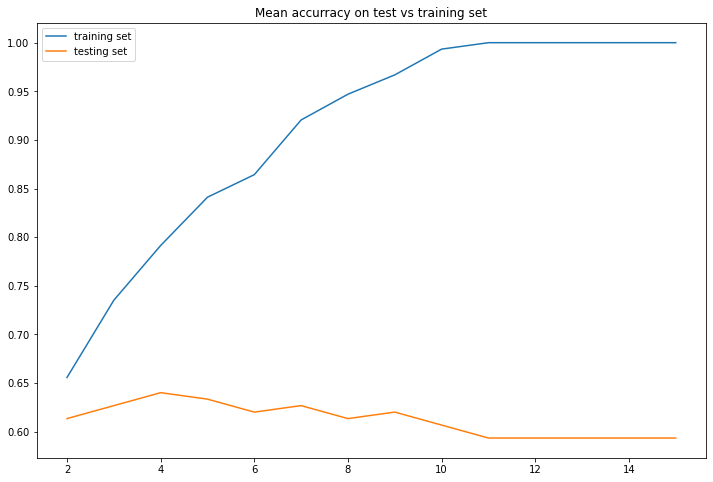

In [41]:
plt.plot(range(2,16), train, label= 'training set')
plt.plot(range(2,16), test, label = 'testing set')
plt.legend()
plt.title('Mean accurracy on test vs training set')
plt.show()